### Example 4 : Conditional Edges

In [17]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END


In [18]:
# Define State here 
class AgentState(TypedDict):
    numbeer1: int 
    operation: str
    number2: int
    finalNumber: int

In [19]:
# create node fuunction for defining actions
def addor(state:AgentState)->AgentState:
    """ add two numbers """
    state['finalNumber'] = state['numbeer1'] + state['number2']
    return state

def subtractor(state:AgentState)->AgentState:
    """ subtract two numbers """
    state['finalNumber'] = state['numbeer1'] - state['number2']
    return state

#conditional function to check operation
def checkoperation(state:AgentState)->AgentState:
    """ check operation """
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"

In [ ]:
graph = StateGraph(AgentState)
# add nodes to graph
graph.add_node("add_node", addor)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) # pass trough node




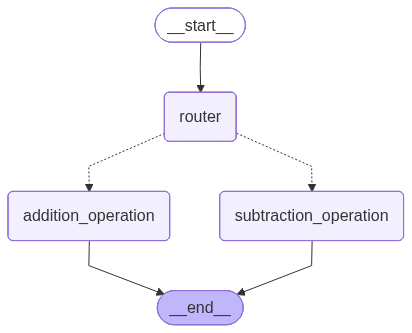

In [ ]:
# create edges 
graph.add_edge(START,"router")
graph.add_conditional_edges("router",checkoperation,{
    "addition_operation":"add_node",
    "subtraction_operation":"subtract_node"
})

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)
# compile graph
graph.compile()
